# Rainfall Trends in India Analysis with Python

Rainfall plays a crucial role in shaping India’s climate, directly influencing agriculture, water resources, and the nation’s economy. Analyzing rainfall patterns over time is vital for strategic planning in areas like agriculture, disaster management, and urban water supply. If you're interested in learning how to study and interpret rainfall trends in a country, this article is here to guide you. I'll walk you through the process of analyzing Rainfall Trends in India using Python.

In this analysis, the goal is to identify long-term trends, seasonal patterns, and anomalies in India's rainfall data. We'll delve into historical trends, pinpoint years with extreme or deficient rainfall, analyze the relationship between seasonal and annual rainfall, and use time series models to forecast future rainfall patterns.

The dataset for this analysis provides a comprehensive record of rainfall measurements, including monthly, seasonal (e.g., monsoon rainfall), and annual totals spanning over a century. This rich dataset is ideal for examining variability, detecting anomalies, and uncovering trends essential for understanding India's rainfall dynamics and predicting future changes.

# Import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Rainfall = pd.read_csv(r"C:\Users\ratho\.ipynb_checkpoints\DATA\rainfall.csv")

In [3]:
Rainfall

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,INDIA,2011,7.7,26.3,21.4,41.0,51.6,182.8,243.0,284.6,190.5,36.5,18.4,6.5,1110.1,34.0,113.9,900.9,61.4
111,INDIA,2012,28.5,10.8,10.6,48.5,32.1,125.0,258.1,263.9,197.7,59.8,28.9,9.6,1073.5,39.3,91.2,844.7,98.3
112,INDIA,2013,10.0,36.9,14.5,29.4,56.5,217.9,305.4,248.4,148.4,128.9,13.7,6.2,1216.2,46.9,100.4,920.1,148.7
113,INDIA,2014,17.3,25.9,32.6,20.2,72.8,95.5,258.8,237.9,187.9,60.9,13.5,10.4,1033.7,43.2,125.5,780.1,84.8


# Data Quick Check 

In [4]:
Rainfall.shape

(115, 19)

In [5]:
Rainfall.ndim

2

In [6]:
Rainfall.size

2185

In [7]:
Rainfall.head()

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6


In [8]:
Rainfall.tail()

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
110,INDIA,2011,7.7,26.3,21.4,41.0,51.6,182.8,243.0,284.6,190.5,36.5,18.4,6.5,1110.1,34.0,113.9,900.9,61.4
111,INDIA,2012,28.5,10.8,10.6,48.5,32.1,125.0,258.1,263.9,197.7,59.8,28.9,9.6,1073.5,39.3,91.2,844.7,98.3
112,INDIA,2013,10.0,36.9,14.5,29.4,56.5,217.9,305.4,248.4,148.4,128.9,13.7,6.2,1216.2,46.9,100.4,920.1,148.7
113,INDIA,2014,17.3,25.9,32.6,20.2,72.8,95.5,258.8,237.9,187.9,60.9,13.5,10.4,1033.7,43.2,125.5,780.1,84.8
114,INDIA,2015,17.4,21.0,62.0,69.4,53.8,192.8,242.4,205.2,131.8,42.9,39.4,15.0,1093.2,38.4,185.2,772.2,97.3


In [9]:
Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   REGION   115 non-null    object 
 1   YEAR     115 non-null    int64  
 2   JAN      115 non-null    float64
 3   FEB      115 non-null    float64
 4   MAR      115 non-null    float64
 5   APR      115 non-null    float64
 6   MAY      115 non-null    float64
 7   JUN      115 non-null    float64
 8   JUL      115 non-null    float64
 9   AUG      115 non-null    float64
 10  SEP      115 non-null    float64
 11  OCT      115 non-null    float64
 12  NOV      115 non-null    float64
 13  DEC      115 non-null    float64
 14  ANNUAL   115 non-null    float64
 15  Jan-Feb  115 non-null    float64
 16  Mar-May  115 non-null    float64
 17  Jun-Sep  115 non-null    float64
 18  Oct-Dec  115 non-null    float64
dtypes: float64(17), int64(1), object(1)
memory usage: 17.2+ KB


In [10]:
Rainfall

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,INDIA,2011,7.7,26.3,21.4,41.0,51.6,182.8,243.0,284.6,190.5,36.5,18.4,6.5,1110.1,34.0,113.9,900.9,61.4
111,INDIA,2012,28.5,10.8,10.6,48.5,32.1,125.0,258.1,263.9,197.7,59.8,28.9,9.6,1073.5,39.3,91.2,844.7,98.3
112,INDIA,2013,10.0,36.9,14.5,29.4,56.5,217.9,305.4,248.4,148.4,128.9,13.7,6.2,1216.2,46.9,100.4,920.1,148.7
113,INDIA,2014,17.3,25.9,32.6,20.2,72.8,95.5,258.8,237.9,187.9,60.9,13.5,10.4,1033.7,43.2,125.5,780.1,84.8


In [11]:
Rainfall.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1958.000000,19.759130,23.434783,28.254783,38.241739,62.193913,168.360000,291.022609,258.400870,172.473043,75.701739,29.205217,14.980000,1182.034783,43.189565,128.694783,890.260870,119.882609
std,33.341666,9.992628,11.512739,12.286408,10.353040,15.673378,35.569654,41.161390,34.975419,36.641234,28.268152,16.101056,8.788761,110.686214,14.476335,22.895134,89.179055,32.467126
min,1901.000000,2.700000,2.700000,7.200000,16.100000,32.100000,86.500000,138.900000,191.700000,96.900000,20.000000,3.600000,1.600000,920.800000,11.700000,84.500000,679.500000,52.700000
25%,1929.500000,13.000000,13.300000,19.750000,31.600000,51.600000,144.050000,267.350000,233.950000,144.850000,55.600000,17.300000,9.600000,1102.400000,33.800000,112.350000,823.550000,97.050000
50%,1958.000000,17.800000,22.500000,25.500000,37.400000,59.500000,165.600000,295.800000,259.300000,173.100000,69.200000,26.100000,14.100000,1190.500000,41.300000,125.100000,897.800000,116.200000
75%,1986.500000,24.850000,30.300000,34.400000,43.850000,71.200000,192.050000,318.650000,287.950000,198.300000,92.850000,39.650000,19.000000,1243.550000,51.400000,139.650000,959.650000,142.150000
max,2015.000000,58.500000,53.800000,63.300000,69.400000,114.500000,275.500000,383.400000,335.500000,281.000000,158.800000,74.200000,54.400000,1480.300000,86.300000,209.700000,1094.500000,207.500000


In [12]:
Rainfall.dtypes

REGION      object
YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
Jan-Feb    float64
Mar-May    float64
Jun-Sep    float64
Oct-Dec    float64
dtype: object

In [13]:
Rainfall.isnull().sum()

REGION     0
YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
Jan-Feb    0
Mar-May    0
Jun-Sep    0
Oct-Dec    0
dtype: int64

In [14]:
Rainfall.nunique()

REGION       1
YEAR       115
JAN         99
FEB         93
MAR        104
APR        103
MAY        104
JUN        114
JUL        112
AUG        112
SEP        111
OCT        105
NOV        106
DEC         90
ANNUAL     115
Jan-Feb    105
Mar-May    107
Jun-Sep    114
Oct-Dec    110
dtype: int64

# Seperating ctegorical and numerical columns 

In [15]:
Cat = Rainfall.select_dtypes (include = 'object').columns
Num = Rainfall.select_dtypes(exclude = 'object').columns 

Cat, Num

(Index(['REGION'], dtype='object'),
 Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
        'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
        'Oct-Dec'],
       dtype='object'))

# Categorical Columns Analysis

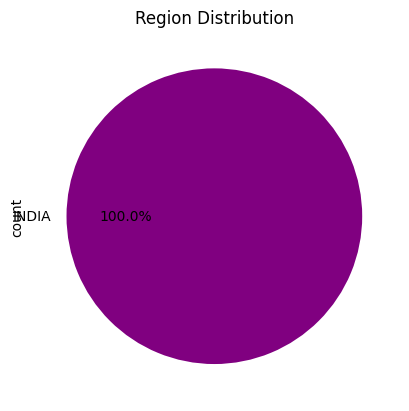

In [16]:
Cat = ['REGION']


# Pie Chart for Mail Subscription
Rainfall['REGION'].value_counts().plot.pie(autopct='%1.1f%%', colors=['purple', 'pink'])
plt.title('Region Distribution')
plt.show()

# Numerical Columns Analysis

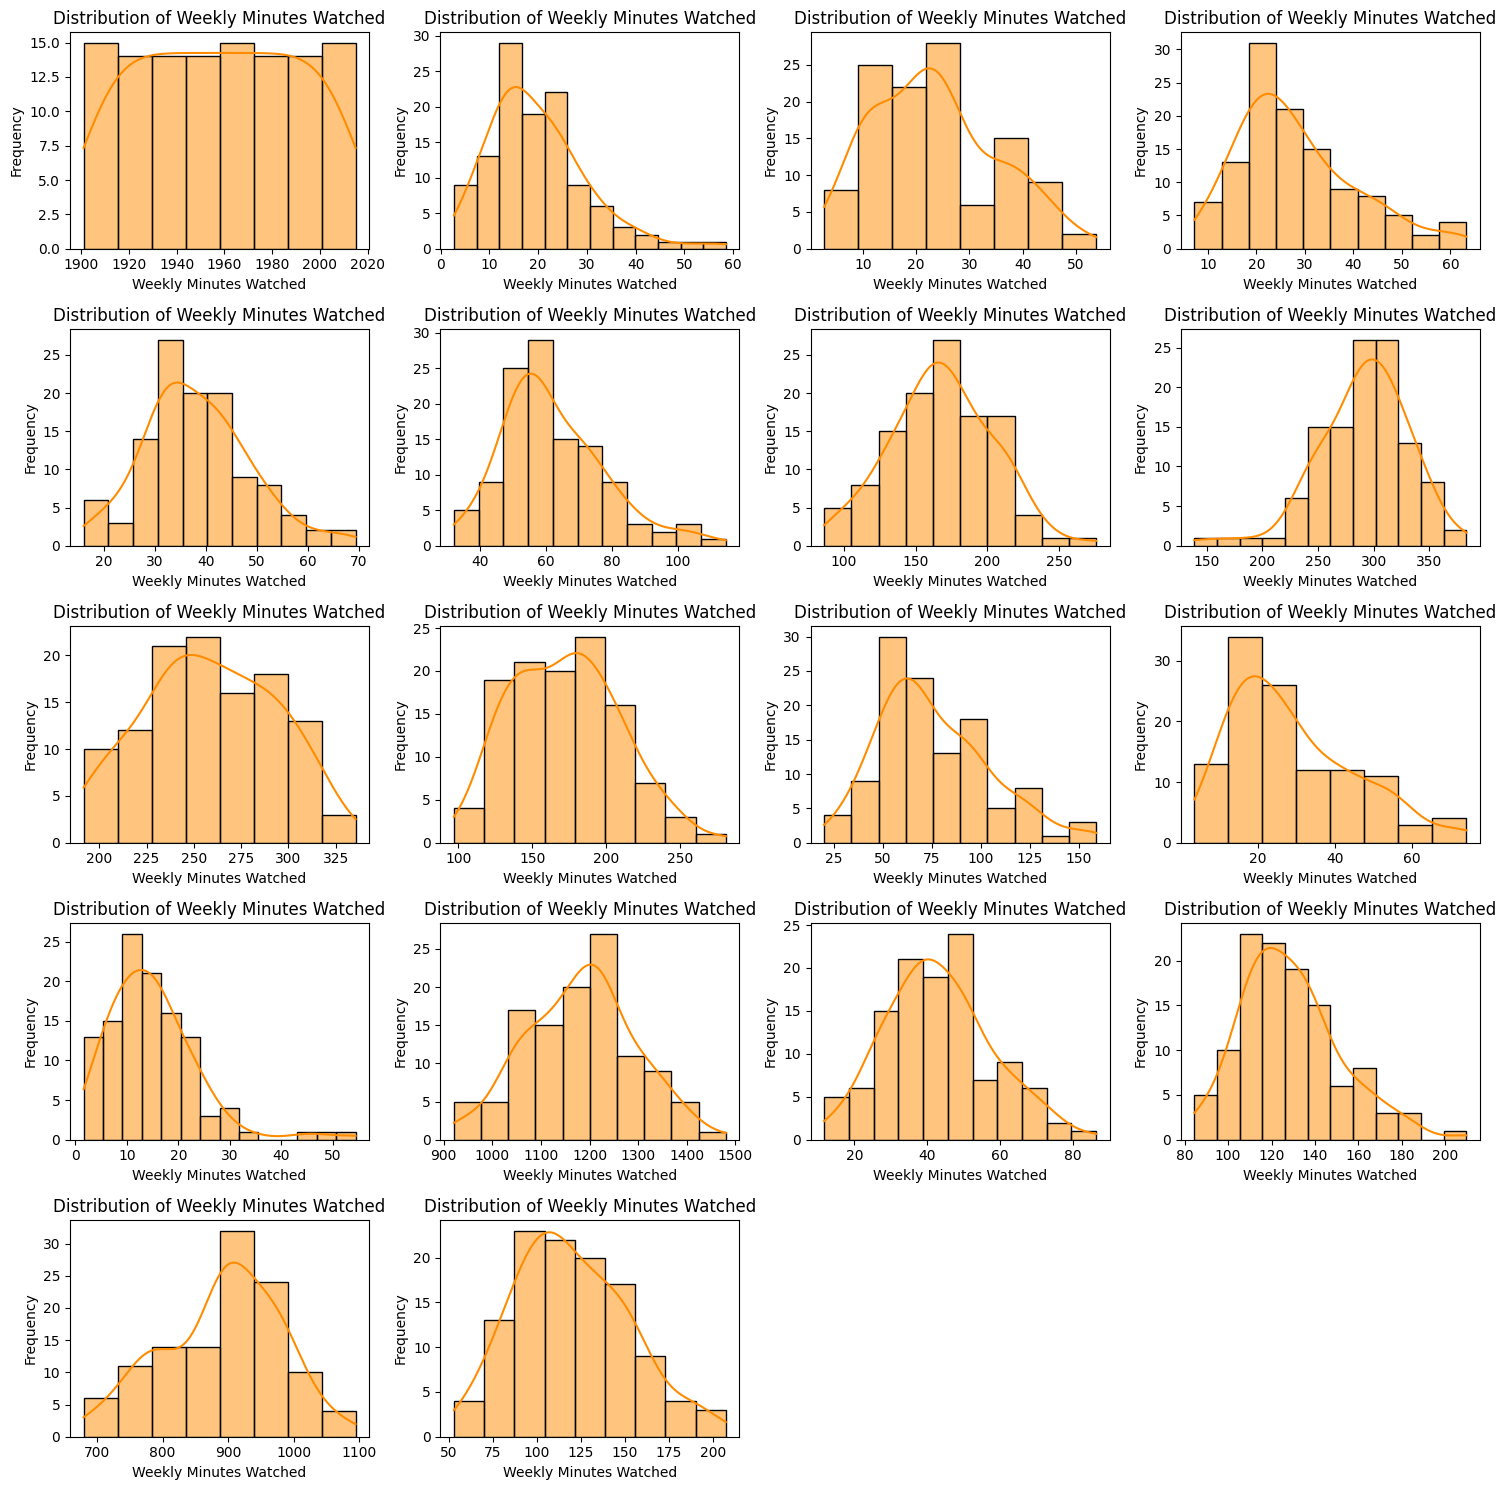

In [17]:
Num = ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
        'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
        'Oct-Dec']

plt.figure(figsize=(15, 15))
for i, col in enumerate(Num):
    plt.subplot(5, 4, i+1)
    sns.histplot(x = Rainfall[col], kde=True, color='darkorange')
    plt.title('Distribution of Weekly Minutes Watched')
    plt.xlabel('Weekly Minutes Watched')
    plt.ylabel('Frequency')
    
    
plt.tight_layout()
plt.show()

# Outliers Analysis 

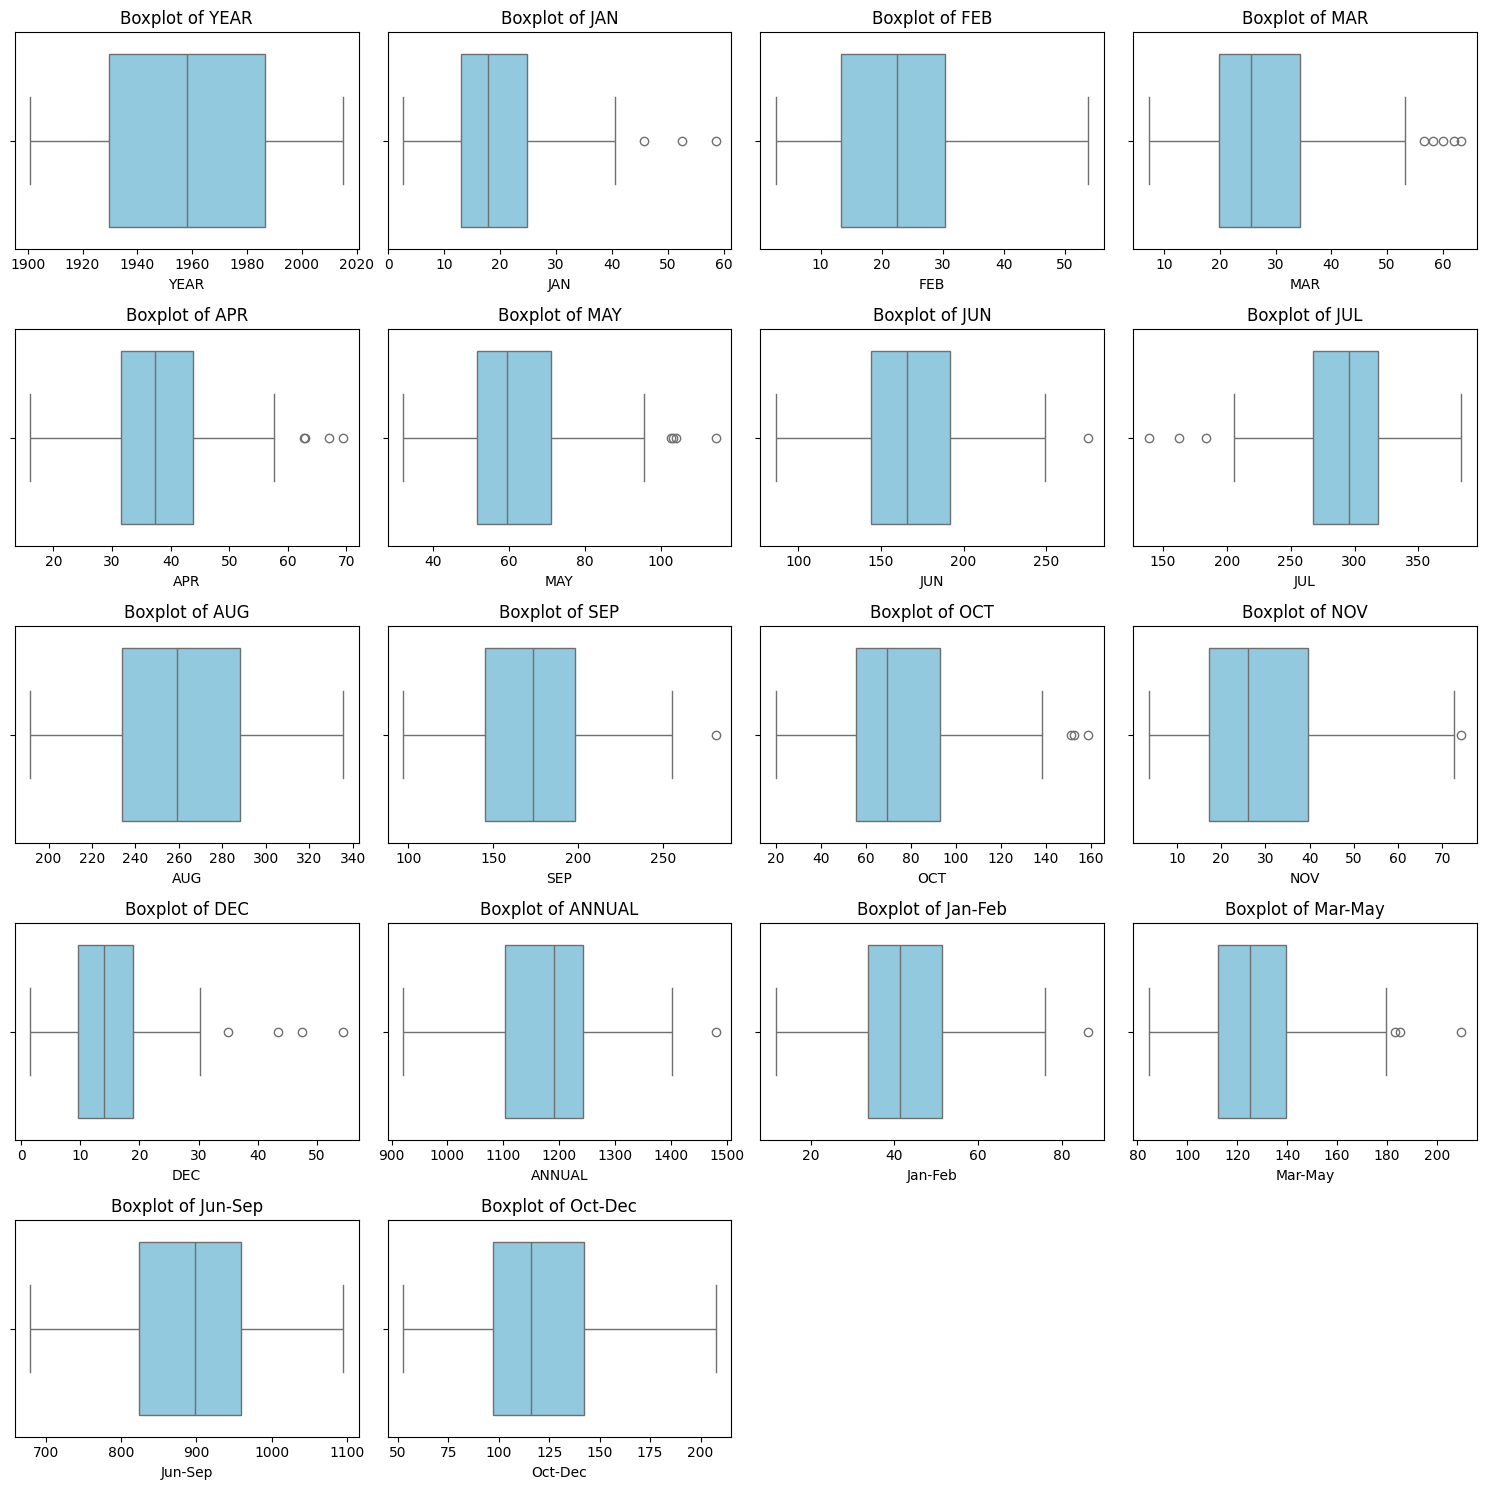

In [3]:
Num = ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
        'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
        'Oct-Dec']

plt.figure(figsize = (15, 15))
for i, col in enumerate(Num):
    plt.subplot(5,4, i+1)
    sns.boxplot(x = Rainfall[col], color = 'skyblue')
    plt.title(f'Boxplot of {col}', fontsize = 12)
    plt.xlabel(col,fontsize = 10)
plt.tight_layout()
plt.show()

In [11]:
Rainfall.shape  #with outliers 

(115, 19)

In [5]:
Num = ['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep',
       'Oct-Dec']

# Initialize a mask for all rows
outlier_mask = pd.Series(True, index=Rainfall.index)

# Loop through all numeric columns to create an outlier mask
for col in Num:
    # Calculate Q1 and Q3
    Q1 = Rainfall[col].quantile(0.25)
    Q3 = Rainfall[col].quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define Outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Update the mask for current column
    outlier_mask &= (Rainfall[col] >= lower_bound) & (Rainfall[col] <= upper_bound)

# Apply the mask to the original DataFrame
Rainfall = Rainfall[outlier_mask]

# Verify the data after removing outliers
print(Rainfall.head())


  REGION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  \
0  INDIA  1901  34.7  37.7  18.0  39.3  50.8  113.4  242.2  272.9  124.4   
1  INDIA  1902   7.4   4.3  19.0  43.5  48.3  108.8  284.0  199.7  201.5   
2  INDIA  1903  17.0   8.3  31.3  17.1  59.5  118.3  297.0  270.4  199.1   
3  INDIA  1904  14.4   9.6  31.8  33.1  72.4  164.8  261.0  206.4  129.6   
4  INDIA  1905  25.3  20.9  42.7  33.7  55.7   93.3  252.8  200.8  178.4   

     OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0   52.7  38.0   8.3  1032.3     72.4    108.1    752.8     99.0  
1   61.5  27.9  24.4  1030.2     11.7    110.8    794.0    113.8  
2  117.9  36.9  17.7  1190.5     25.3    107.9    884.8    172.5  
3   69.0  11.2  16.3  1019.8     24.0    137.4    761.8     96.6  
4   51.4   9.7  10.5   975.3     46.2    132.2    725.4     71.6  


In [6]:
Rainfall.shape ## after outlier treatment 

(90, 19)

### Analyzing Annual Rainfall Trends Over Time  
To gain a comprehensive understanding of rainfall patterns, we’ll create and analyze three types of visualizations:  

1. **Annual Rainfall Over Time**  
   We'll plot the annual rainfall data alongside the overall mean rainfall. This visualization will help us identify any long-term trends, such as an increase or decrease in rainfall over the years, and detect deviations from the average.  

2. **Monthly Average Rainfall**  
   By calculating the average rainfall for each month across all years, we can create a bar chart to highlight the months with the highest and lowest average rainfall. This provides insights into the seasonal distribution of rainfall.  

3. **Seasonal Rainfall Analysis**  
   We'll aggregate the rainfall data into four key seasons:  
   - **Winter (Jan-Feb)**  
   - **Pre-Monsoon (Mar-May)**  
   - **Monsoon (Jun-Sep)**  
   - **Post-Monsoon (Oct-Dec)**  
   Plotting these seasonal aggregates will help us understand rainfall variability across different parts of the year.  

Now, let’s dive into these visualizations to explore rainfall trends in India in greater detail.

### Annual Rainfall Over Time

Annual rainfall:       YEAR  ANNUAL
0    1901  1032.3
1    1902  1030.2
2    1903  1190.5
3    1904  1019.8
4    1905   975.3
..    ...     ...
109  2010  1200.5
110  2011  1110.1
111  2012  1073.5
112  2013  1216.2
113  2014  1033.7

[90 rows x 2 columns]
Mean annual rainfall:  1173.1177777777777


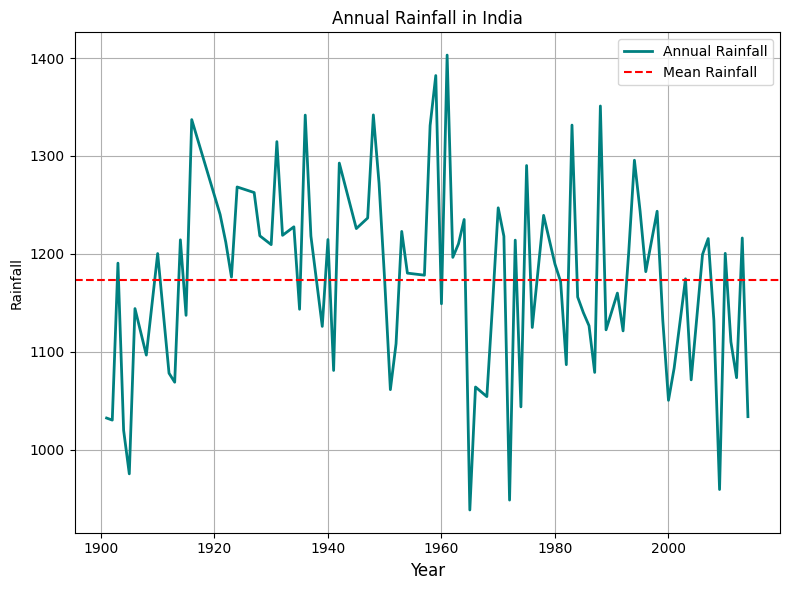

In [7]:
# analysing trends in yearly rainfall over time 
yearly_rainfall = Rainfall[['YEAR','ANNUAL']]
print('Annual rainfall: ', yearly_rainfall)

# calculating mean of yearly rainfall
mean_rain = yearly_rainfall['ANNUAL'].mean()
print('Mean annual rainfall: ', mean_rain)

# plotting trends of annual rainfall
plt.figure(figsize= (8,6))
sns.lineplot(x= 'YEAR', y ='ANNUAL', data = yearly_rainfall
            ,label = 'Annual Rainfall',color = 'teal',linewidth = 2)
plt.axhline(y = mean_rain, color = 'red', 
            linestyle = '--', label = 'Mean Rainfall')
plt.title('Annual Rainfall in India', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Rainfall', fontsize = 10)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### **Observations**
1. **Range of Annual Rainfall**:
   - The annual rainfall fluctuates between **1000 mm to 1400 mm** over the years.
   - This suggests a moderate degree of variability in India’s rainfall pattern.

2. **Mean Rainfall**:
   - The red dashed line represents the **mean rainfall** across the years, approximately around **1200 mm**.
   - A significant number of years exhibit rainfall either above or below this mean, indicating irregular patterns.

3. **Periods of High and Low Rainfall**:
   - **Above-average rainfall** was observed prominently in certain years (e.g., 1920–1930, mid-1960s).
   - **Below-average rainfall** was recorded in periods like the early 1900s and the 1970s.

4. **Extreme Variability**:
   - Certain years showed **sharp peaks and troughs** (e.g., around the 1960s for higher rainfall and the 1970s for lower rainfall).

5. **No Clear Trend**:
   - Visually, there is no consistent increasing or decreasing trend in annual rainfall, suggesting **stable average rainfall** over the observed period.

---

### **Insights**
1. **Annual Variability and Mean Stability**:
   - Although annual rainfall shows fluctuations, the mean rainfall remains stable, indicating no significant climate-induced shifts during this period.

2. **Impact of Extreme Rainfall**:
   - Years with **above-average rainfall** could correlate with higher risks of floods.
   - Years with **below-average rainfall** (e.g., drought years) could adversely affect agricultural output and water availability.

3. **Lack of Long-term Trends**:
   - The data does not show evidence of a consistent trend (e.g., increase or decrease), which may indicate stable climatic conditions concerning annual rainfall.

---

### **Recommendations**
1. **Flood and Drought Mitigation**:
   - Prepare mitigation strategies for both **flooding** (years with above-average rainfall) and **droughts** (years with below-average rainfall).
   - This can involve robust water management policies, rainwater harvesting, and infrastructure improvements.

2. **Deeper Statistical Analysis**:
   - Perform advanced statistical techniques (e.g., regression or moving averages) to identify hidden trends or patterns.
   - Seasonal decomposition may help understand monsoon-specific variability.

3. **Climate Change Monitoring**:
   - Monitor annual rainfall in conjunction with other climate variables (e.g., temperature, humidity) to detect potential long-term changes.
   - Use predictive models to forecast future rainfall scenarios and plan accordingly.

4. **Data-Driven Agriculture**:
   - Use rainfall data to guide cropping patterns, irrigation strategies, and resource allocation, especially in regions heavily reliant on monsoons.

### Monthly Average Rainfall

C:\Users\ratho\AppData\Local\Temp\ipykernel_7260\135804854.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = monthly_avg.index, y = monthly_avg.values,


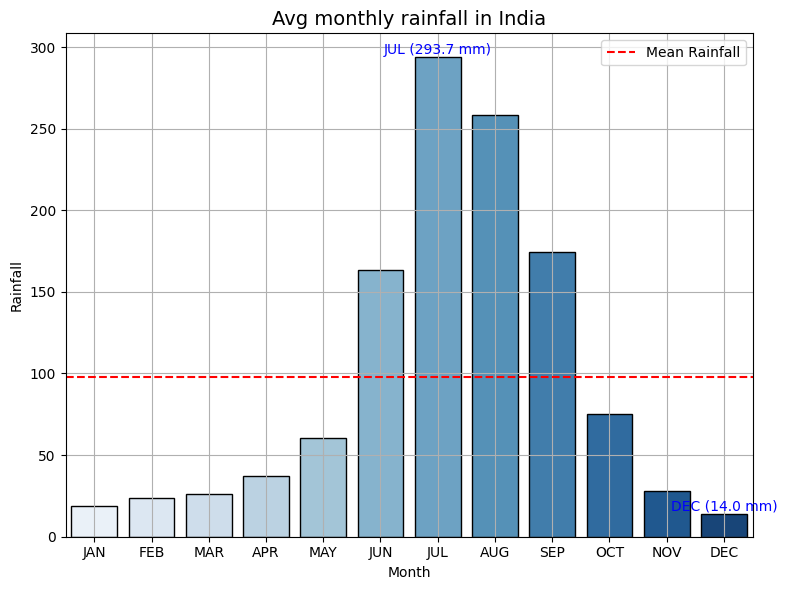

In [8]:
# identify months with the highest and lowest rainfall on average
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = Rainfall[monthly_columns].mean()

# fetching names of month having max and min rainfall
month_of_highest_rainfall = monthly_avg.idxmax()
month_of_lowest_rainfall = monthly_avg.idxmin()

# plotting graph 
plt.figure(figsize=(8,6))
sns.barplot(x = monthly_avg.index, y = monthly_avg.values,
           palette = 'Blues', edgecolor = 'k')
plt.axhline(y = monthly_avg.mean(), color = 'red',
           linestyle = '--', label = 'Mean Rainfall')
plt.title('Avg monthly rainfall in India', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Rainfall')
plt.legend()

# Annotate the highest rainfall month
plt.text(monthly_avg.index.get_loc(month_of_highest_rainfall), 
         monthly_avg[month_of_highest_rainfall], 
         f'{month_of_highest_rainfall} ({monthly_avg[month_of_highest_rainfall]:.1f} mm)', 
         color='blue', ha='center', va='bottom')

# Annotate the lowest rainfall month
plt.text(monthly_avg.index.get_loc(month_of_lowest_rainfall), 
         monthly_avg[month_of_lowest_rainfall], 
         f'{month_of_lowest_rainfall} ({monthly_avg[month_of_lowest_rainfall]:.1f} mm)', 
         color='blue', ha='center', va='bottom')


plt.grid()
plt.tight_layout()
plt.show()


### **Observations**
1. **Seasonal Pattern**:
   - The majority of the rainfall occurs between **June and September**, with **July (293.7 mm)** recording the highest average monthly rainfall.
   - **December (14.0 mm)** records the lowest average rainfall.

2. **Monsoon Dominance**:
   - Rainfall peaks in **July** and remains high during the monsoon months (**June to September**).
   - The months from **October to May** show significantly lower rainfall, reflecting a dry season.

3. **Monthly Mean Rainfall**:
   - The **red dashed line** represents the mean rainfall across all months (around 100 mm).
   - Only the months **June, July, August, and September** have rainfall above this mean.
   - The other months (October–May) consistently fall below the average.

4. **Gradual Onset and Retreat**:
   - Rainfall increases gradually from May to July, peaks in July, and then decreases through August and September, marking the onset and retreat of the monsoon.

---

### **Insights**
1. **Rainfall Concentration**:
   - Approximately **70-80% of the annual rainfall** is concentrated in the **monsoon period** (June–September).
   - This indicates a strong dependency on monsoons for water resources, agriculture, and overall climatic balance.

2. **Dry Periods**:
   - The dry season spans from **October to May**, with negligible rainfall, emphasizing the need for water storage and irrigation systems during these months.

3. **Vulnerability to Monsoon Variability**:
   - Any disruptions or delays in monsoon rainfall could have a profound impact on agriculture, drinking water supply, and hydropower generation in India.

4. **Seasonal Water Management**:
   - The disparity between wet and dry periods underlines the importance of effective water conservation strategies, such as **rainwater harvesting** during monsoons and **efficient irrigation practices** in dry months.

---

### **Recommendations**
1. **Water Resource Planning**:
   - Enhance water storage capacity during the monsoon season to meet the demand during the dry months.
   - Promote **rainwater harvesting** systems in rural and urban areas.

2. **Agricultural Practices**:
   - Focus on **water-intensive crops** (like rice) during the monsoon season.
   - Shift to **drought-resistant crops** during the dry months.

3. **Disaster Preparedness**:
   - Prepare for potential **flooding** during the monsoon months and **droughts** during prolonged dry spells.
   - Implement early warning systems and robust flood management infrastructure.

4. **Long-Term Climate Analysis**:
   - Analyze trends in monthly rainfall over several decades to detect potential impacts of climate change.
   - Use predictive models to plan for changing rainfall patterns and their effects on agriculture and water resources.

### Seasonal Rainfall Analysis

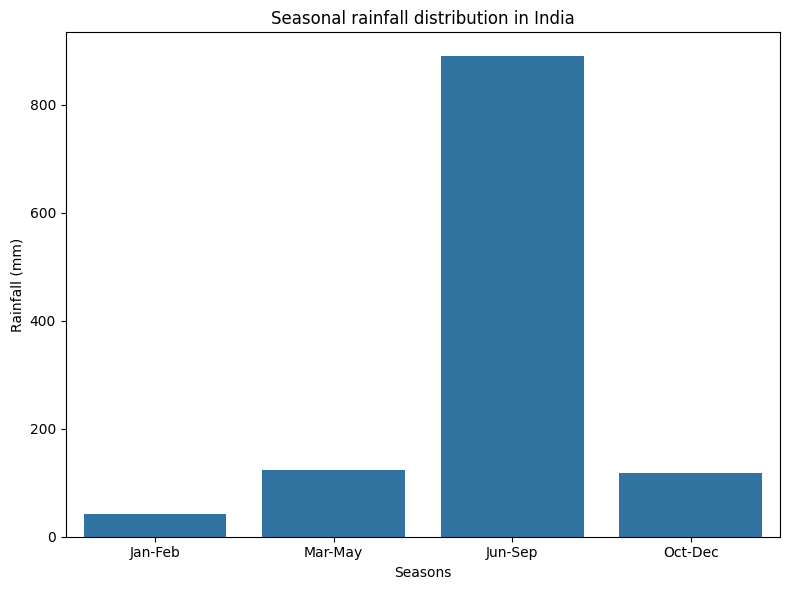

In [9]:
# Seasonal Rainfall distribution 
Seasonal_col = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
Seasonal_avg = Rainfall[Seasonal_col].mean()

# plot
plt.figure(figsize=(8,6))
sns.barplot(x = Seasonal_avg.index, y = Seasonal_avg.values)
plt.title('Seasonal rainfall distribution in India')
plt.xlabel('Seasons')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()


### Observations:
1. **Dominance of the Monsoon Season (Jun-Sep):**
   - The **June–September** period experiences the highest rainfall, surpassing **800 mm**. This is typical of the Indian summer monsoon season, which contributes the majority of annual precipitation.

2. **Pre-monsoon and Post-monsoon Seasons (Mar-May & Oct-Dec):**
   - Rainfall in the **March–May** and **October–December** periods is significantly lower than in the monsoon season, approximately between **100–200 mm**. 
   - The **October–December** rainfall can be attributed to the post-monsoon retreat or the northeast monsoon, particularly impacting southern regions of India.

3. **Winter Season (Jan-Feb):**
   - The **January–February** period records the lowest rainfall, close to or below **50 mm**, aligning with India’s dry winter season.

### Insights:
- The monsoon season is critical for India's agriculture, water resources, and overall climate as it delivers the bulk of annual precipitation.
- Regions dependent on **post-monsoon rainfall (Oct-Dec)**, such as Tamil Nadu, may show distinct reliance compared to other areas.
- The stark contrast in rainfall levels between the monsoon and other seasons emphasizes the importance of water conservation and management during high-rainfall months to address the drier periods.
- Understanding seasonal rainfall patterns is crucial for disaster preparedness, such as floods during the monsoon and droughts in the pre-monsoon period.

### Recommendations:
1. **Water Management:** Implement rainwater harvesting and optimize reservoirs to store monsoon water for dry seasons.  
2. **Agriculture:** Promote monsoon-based crops (e.g., rice) and drought-resistant crops for dry seasons.  
3. **Disaster Preparedness:** Strengthen flood control during the monsoon and drought mitigation for low-rainfall periods.  
4. **Regional Focus:** Develop infrastructure for post-monsoon rainfall use, especially in regions like Tamil Nadu.  
5. **Climate Adaptation:** Use advanced models to predict rainfall changes and encourage afforestation to stabilize water cycles.  
6. **Public Awareness:** Educate on water conservation and sustainable practices for agriculture and daily use.  

# Assessing the Impact of Climate Change in the Rainfall Trends in India

C:\Users\ratho\AppData\Local\Temp\ipykernel_7260\3867896684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rainfall['10-Year Rolling Avg'] = Rainfall['ANNUAL'].rolling(window=10).mean()


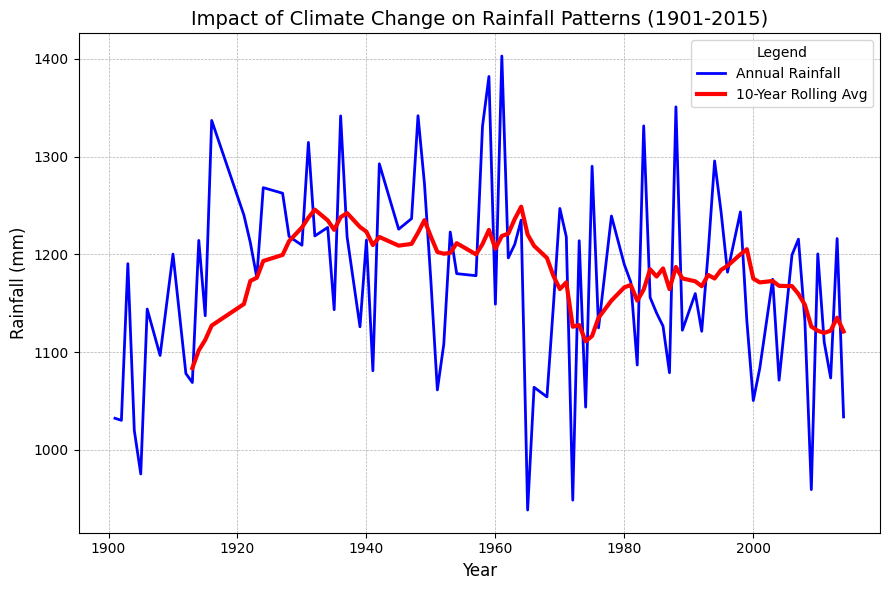

In [10]:
# Calculate a 10-year rolling average
Rainfall['10-Year Rolling Avg'] = Rainfall['ANNUAL'].rolling(window=10).mean()

plt.figure(figsize=(9, 6))
sns.lineplot(x='YEAR', y='ANNUAL', 
             data=Rainfall, label='Annual Rainfall',
             color='blue', linewidth=2)

# Plot the 10-year rolling average
sns.lineplot(x='YEAR', y='10-Year Rolling Avg', 
             data=Rainfall, label='10-Year Rolling Avg', 
             color='red', linewidth=3)

plt.title('Impact of Climate Change on Rainfall Patterns (1901-2015)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.legend(title='Legend', fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Observations:
**Annual Rainfall Variability:**

- The blue line shows significant year-to-year fluctuations in annual rainfall from 1901 to 2015, indicating natural variability.
- Some years exhibit extreme rainfall (above 1300 mm), while others dip below 1000 mm.

**10-Year Rolling Average Trend:**

- The red line (10-year rolling average) smooths out short-term fluctuations, providing a clearer view of long-term trends.
- A steady increase in rainfall is observed from 1901 to the 1950s.
- After the 1960s, the trend stabilizes, but post-1980s, it shows a gradual decline in average rainfall.

**Impact of Climate Change:**

- Fluctuations in annual rainfall may be linked to climate variability, such as El Niño and La Niña events.
- The declining trend after the 1980s could indicate the impact of climate change, including altered monsoon patterns and increasing frequency of extreme weather events.

### Insights:
- Rainfall patterns are becoming less predictable, highlighting the increasing influence of climate change.
- The gradual decline in the 10-year rolling average post-1980s suggests a need for adaptive measures in agriculture, water resource management, and disaster preparedness.

### Recommendations:
1. **Water Security:** Build better water storage and groundwater recharge systems.  
2. **Agriculture:** Promote drought-tolerant crops and efficient irrigation methods.  
3. **Climate Action:** Enhance afforestation and participate in global climate mitigation efforts.  
4. **Research:** Improve rainfall monitoring and predictive models for better preparedness.  

# Identify years with extreme or deficient rainfall

In [11]:
Rainfall.columns

Index(['REGION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', '10-Year Rolling Avg'],
      dtype='object')

In [12]:
# calculate mean and standard deviation 
mean_rainfall = Rainfall['ANNUAL'].mean()
std_dev_rainfall = Rainfall['ANNUAL'].std()

# identify deficient and extreme rainfall years 
deficient_years = Rainfall[Rainfall['ANNUAL'] < mean_rainfall - 1.5 * std_dev_rainfall]
extreme_years = Rainfall[Rainfall['ANNUAL'] > mean_rainfall + 1.5 * std_dev_rainfall]

# Calculate correlation 
Seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
Seasonal_corr= {Seasons: Rainfall[Seasons].corr(Rainfall['ANNUAL'])for Seasons in Seasons}

print("Deficient Years:")
print(deficient_years[['YEAR', 'ANNUAL']])
print("\nExtreme Rainfall Years:")
print(extreme_years[['YEAR', 'ANNUAL']])
print("\nSeasonal Rainfall Correlations with Annual Rainfall:")
print(Seasonal_corr)

Deficient Years:
     YEAR  ANNUAL
3    1904  1019.8
4    1905   975.3
64   1965   938.4
71   1972   948.5
108  2009   959.3

Extreme Rainfall Years:
    YEAR  ANNUAL
15  1916  1337.1
35  1936  1341.7
47  1948  1341.9
57  1958  1331.0
58  1959  1382.1
60  1961  1403.0
82  1983  1331.5
87  1988  1351.0

Seasonal Rainfall Correlations with Annual Rainfall:
{'Jan-Feb': 0.24800542284769625, 'Mar-May': 0.25475724061007626, 'Jun-Sep': 0.9302412443782415, 'Oct-Dec': 0.4173412644471213}


### Observations:
**Deficient Rainfall Years:**

- Years like 1904, 1905, 1965, 1972, and 2009 had very low rainfall, likely causing droughts and water scarcity.

**Extreme Rainfall Years:**

- Years such as 1961 (1403 mm) and 1959 (1382 mm) had very high rainfall, increasing the risk of floods.

**Seasonal Contribution to Annual Rainfall:**

- The monsoon season (June–September) contributes the most to annual rainfall, with a very high correlation (0.93).
- Other seasons like October–December play a moderate role (correlation: 0.42), while January–February and March–May have minimal impact.

###  Insights:  
1. **Drought Years:** Deficient rainfall years (e.g., 2009) cause water scarcity, affecting agriculture and livelihoods.  
2. **Flood Years:** Extreme rainfall years (e.g., 1961) increase flood risks, requiring better management.  
3. **Monsoon Dominance:** June–September contributes most rainfall, critical for water and agriculture.  
4. **Post-Monsoon Role:** October–December rainfall supports southern regions but has less impact overall.  
5. **Dry Periods:** January–May has minimal rainfall, highlighting the need to store water from wetter seasons. 

### Recommendations:
**Drought Management:** Store water during good rainfall years and use drought-resistant crops.

**Flood Preparedness:** Build better drainage systems and set up early flood warning mechanisms.

**Monsoon Focus:** Prioritize rainwater harvesting during June–September.

**Post-Monsoon Utilization:** Use October–December rainfall for agriculture and groundwater recharge.
Seasonal Planning: Adapt farming and water use to seasonal rainfall patterns.

# Detecting Anomalies in the Rainfall Trends in India

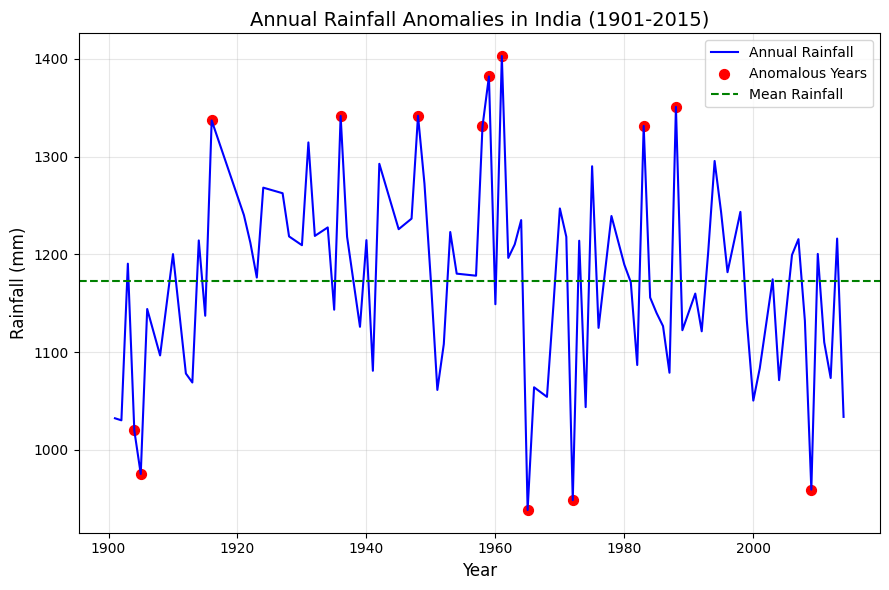

In [13]:
# Detect anomalous rainfall years based on annual data
# Identify anomalies in annual rainfall
annual_anomalies = Rainfall[(Rainfall['ANNUAL'] < mean_rainfall - 1.5 * std_dev_rainfall) | 
                            (Rainfall['ANNUAL'] > mean_rainfall + 1.5 * std_dev_rainfall)]

# Plotting annual rainfall and anomalies
plt.figure(figsize=(9, 6))
sns.lineplot(data=Rainfall, x='YEAR', y='ANNUAL', 
             label='Annual Rainfall', color='blue')
plt.scatter(annual_anomalies['YEAR'], annual_anomalies['ANNUAL'], 
            color='red', label='Anomalous Years', s=50)

# Add a horizontal line for the mean rainfall
mean_rainfall = Rainfall['ANNUAL'].mean()
plt.axhline(mean_rainfall, color='green', linestyle='--', label='Mean Rainfall')


plt.title('Annual Rainfall Anomalies in India (1901-2015)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Observations:  
1. **Extreme Years:**  
   - Some years had very low rainfall (e.g., 1905, 1965, 2009), causing droughts.  
   - Other years had very high rainfall (e.g., 1961, 1988), leading to flood risks.  

2. **Rainfall Fluctuations:**  
   - Annual rainfall fluctuates widely but stays close to the long-term average (green dashed line).  

3. **Impact of Climate:**  
   - Changes in rainfall are likely influenced by climate patterns like droughts and heavy rains.  

### Insights:  
1. **Drought and Flood Risks:**  
   - India regularly faces drought and flood cycles, affecting water resources and agriculture.  
2. **Stable Long-Term Average:**  
   - Despite yearly variations, the average rainfall provides a useful benchmark for planning.  
3. **Increasing Extremes:**  
   - Extreme years seem to be more frequent, showing the effects of climate variability.  

---

### Recommendations:  
1. **Water Storage:**  
   - Build systems to store excess rainwater during flood years for use in drought years.  
2. **Flood Management:**  
   - Improve drainage systems and flood defenses to reduce damage during heavy rains.  
3. **Drought-Resilient Farming:**  
   - Promote crops and irrigation methods suited to drought-prone conditions.  
4. **Climate Monitoring:**  
   - Use advanced weather predictions to prepare for extreme rainfall events.  
5. **Policy Action:**  
   - Develop national strategies to address rainfall variability and its impacts.  

# Identify anomalies in monthly rainfall

C:\Users\ratho\AppData\Local\Temp\ipykernel_7260\3537474713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Rainfall (mm)', data=Rainfall_melted, palette='Set2')


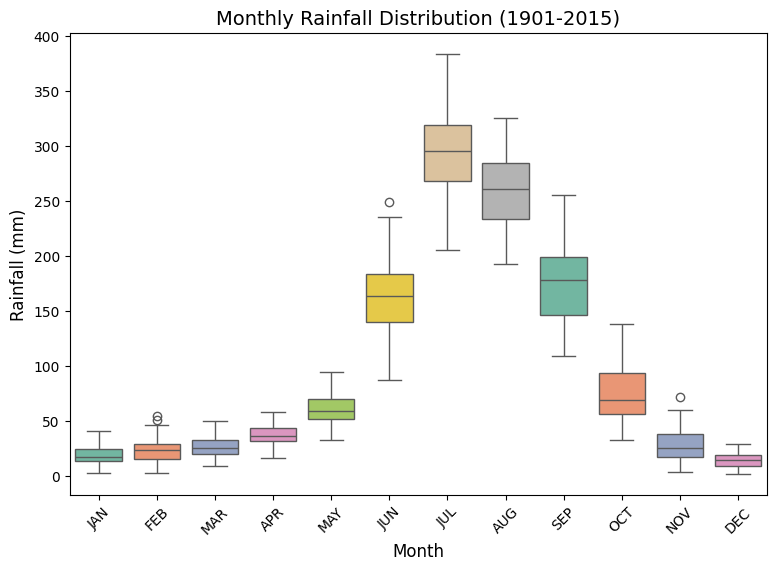

In [14]:
plt.figure(figsize=(9, 6))

monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Plot the monthly rainfall data using boxplot
#sns.boxplot(data=Rainfall[monthly_columns], palette='Set2')

Rainfall_melted = Rainfall[monthly_columns].melt(var_name='Month', value_name='Rainfall (mm)')
sns.boxplot(x='Month', y='Rainfall (mm)', data=Rainfall_melted, palette='Set2')

# Add title and labels
plt.title('Monthly Rainfall Distribution (1901-2015)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.show()


- The **variability in rainfall is most pronounced during the monsoon months** (June to September), emphasizing their critical role in India’s rainfall dynamics.  
- **Anomalies in non-monsoon months**, while less frequent, indicate periods of unusual weather patterns.  
- These anomalies may be linked to **climate variability** or **regional disturbances**.  
- The graph highlights the **uneven distribution of rainfall** and India's **high dependence on monsoonal rainfall** for water resources.  

# Correlating Seasonal Rainfall with Annual Totals

C:\Users\ratho\AppData\Local\Temp\ipykernel_7260\3782993195.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relationships.index, y=relationships.values, palette='Blues_d')


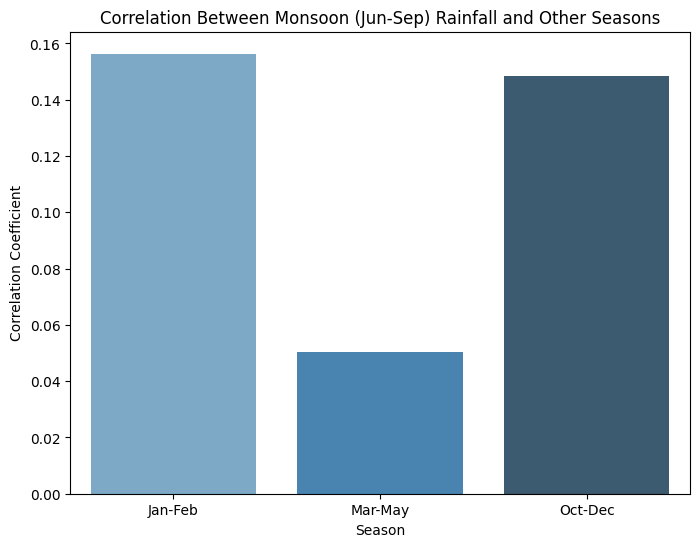

In [15]:
# Assuming 'rainfall_data' is your dataframe containing seasonal columns
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
monsoon_column = 'Jun-Sep'

# Calculate the correlation matrix for the relevant columns
seasonal_data = Rainfall[seasonal_columns]
correlation_matrix = seasonal_data.corr()

# Extract the correlation of 'Jun-Sep' with other seasons
relationships = correlation_matrix[monsoon_column].drop(monsoon_column)

# Create a bar plot for the correlation coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x=relationships.index, y=relationships.values, palette='Blues_d')
plt.title('Correlation Between Monsoon (Jun-Sep) Rainfall and Other Seasons')
plt.xlabel('Season')
plt.ylabel('Correlation Coefficient')
plt.show()


# Grouping Years Based on Rainfall Patterns
we will group years into three categories: Dry, Normal, and Wet, based on rainfall patterns:

C:\Users\ratho\AppData\Local\Temp\ipykernel_7260\1367856292.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rainfall['Rainfall_Category'] = Rainfall['ANNUAL'].apply(categorize_rainfall)


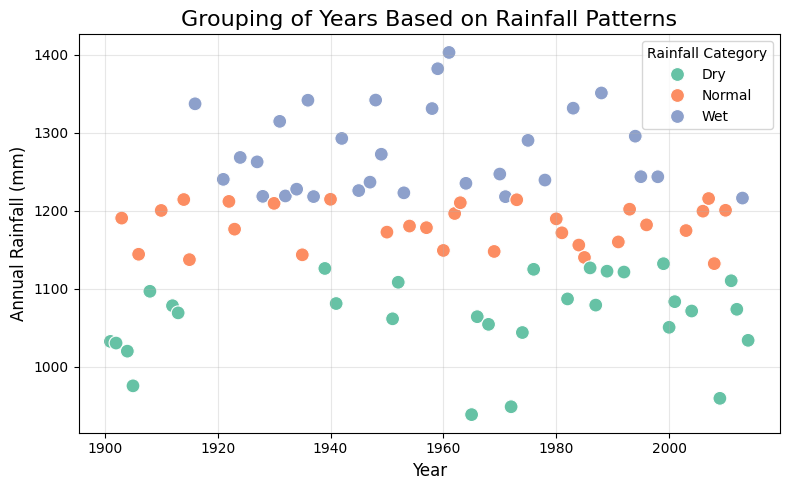

In [16]:
# Define thresholds for grouping (e.g., based on percentiles)
low_threshold = Rainfall['ANNUAL'].quantile(0.33)  # Bottom 33%
high_threshold = Rainfall['ANNUAL'].quantile(0.67)  # Top 67%

# Categorize years into groups
def categorize_rainfall(annual_rainfall):
    if annual_rainfall <= low_threshold:
        return 'Dry'
    elif annual_rainfall <= high_threshold:
        return 'Normal'
    else:
        return 'Wet'

Rainfall['Rainfall_Category'] = Rainfall['ANNUAL'].apply(categorize_rainfall)

# Plot the grouped data
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=Rainfall,
    x='YEAR',
    y='ANNUAL',
    hue='Rainfall_Category',
    palette='Set2',
    s=100
)
plt.title('Grouping of Years Based on Rainfall Patterns', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Rainfall (mm)', fontsize=12)
plt.legend(title='Rainfall Category')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


The clustering of rainfall patterns reveals interesting trends over time. Most years fall into the "Normal" category, indicating consistent rainfall levels, while "Wet" years, characterized by above-normal rainfall, are sporadically distributed, with a notable concentration in the early and mid-20th century. On the other hand, "Dry" years, marked by below-normal rainfall, appear to be more frequent in the latter half of the timeline, suggesting a possible shift in rainfall dynamics over time. This variability and the increasing frequency of dry years may reflect long-term changes in climatic conditions, possibly influenced by factors like global warming or environmental changes. These findings highlight the need for further trend analysis to confirm any statistically significant shifts and underscore the importance of proactive water resource management and climate resilience planning to address emerging challenges in rainfall variability.

# Applying Linear Regression Model 

C:\Users\ratho\AppData\Local\Temp\ipykernel_7260\448793567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rainfall['DATE'] = pd.to_datetime(Rainfall['YEAR'], format = '%Y')
C:\Users\ratho\AppData\Local\Temp\ipykernel_7260\448793567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rainfall['Moving_Avg'] = Annual_Rain.rolling(window=5).mean()
C:\Users\ratho\AppData\Local\Temp\ipykernel_7260\448793567.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

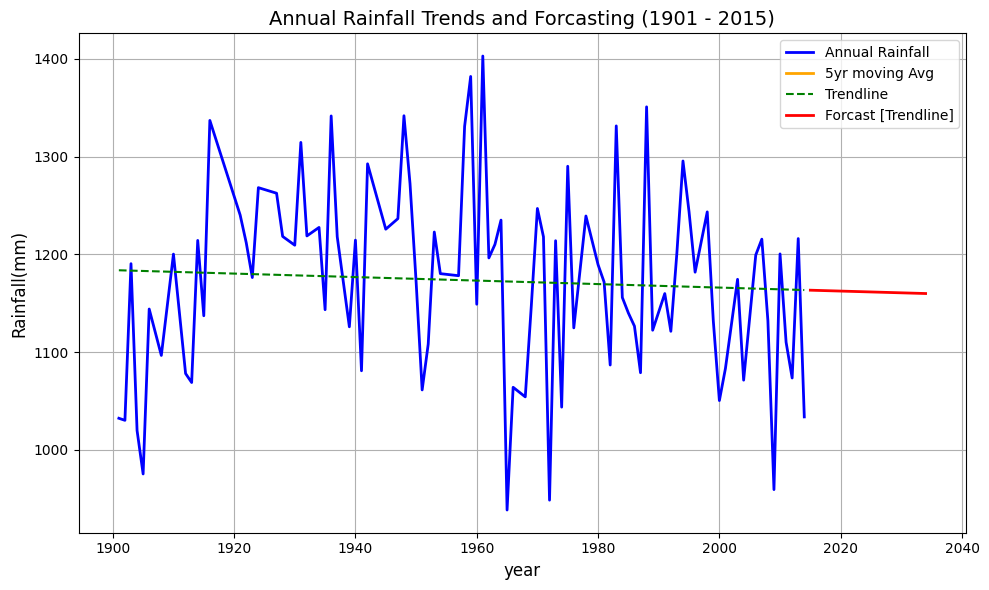

In [26]:
from sklearn.linear_model import LinearRegression 

# Conform Rainfall data contain Year and Annual columns 
Rainfall['DATE'] = pd.to_datetime(Rainfall['YEAR'], format = '%Y')
Annual_Rain = Rainfall.set_index('DATE')['ANNUAL']

# Calculate moving avg 
Rainfall['Moving_Avg'] = Annual_Rain.rolling(window=5).mean()

# Fiting Linear Regression Model
x = Rainfall['YEAR'].values.reshape(-1,1)
y = Rainfall['ANNUAL'].values
model = LinearRegression()
model.fit(x,y)
Rainfall['Trend'] = model.predict(x)

# Forcast next 20 yr using linear model 
Future_yr = np.arange(Rainfall['YEAR'].max() + 1, Rainfall['YEAR'].max() +21).reshape(-1,1)
Future_trend = model.predict(Future_yr)

# plot graph 
plt.figure(figsize = (10 , 6))
sns.lineplot(x = Rainfall['YEAR'], y = Rainfall['ANNUAL'], label = 'Annual Rainfall', color = "blue", linewidth = 2)
sns.lineplot(x = Rainfall['YEAR'], y = Rainfall['Moving_Avg'], label = '5yr moving Avg', color = 'orange', linewidth = 2)
sns.lineplot(x = Rainfall['YEAR'], y = Rainfall['Trend'], label = 'Trendline', color = 'green', linestyle = '--')

# plot forcast values 
plt.plot(Future_yr, Future_trend, label = 'Forcast [Trendline]', color = 'red', linewidth = 2)

# Add labels 
plt.title('Annual Rainfall Trends and Forcasting (1901 - 2015)', fontsize = 14)
plt.xlabel('year', fontsize = 12)
plt.ylabel('Rainfall(mm)', fontsize = 12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The graph shows the yearly rainfall from 1901 to 2015. The blue line goes up and down a lot, showing how rainfall changes every year. The yellow line smooths these ups and downs to show average patterns over five years. The green dashed line is a trendline, which shows that rainfall has stayed mostly steady over time but with a slight decrease. The red line extends this trendline to predict future rainfall, suggesting it might slightly decrease. In simple terms, rainfall has varied a lot year-to-year, but there’s no big long-term increase or decrease, just a small downward trend.

# Conclusion

The analysis of India’s rainfall from 1901 to 2015 shows a lot of variation in both annual and seasonal rainfall, with the monsoon season (June-September) being the main contributor. There have been years with extreme droughts and excessive rainfall, showing how unpredictable the rainfall can be. However, there’s a trend of more dry years in recent decades. The data also shows that non-monsoon seasons aren’t strongly dependent on monsoon rainfall. A time-series forecast using Prophet suggests a slight decrease in annual rainfall in the future, stressing the importance of planning and adapting water resource management to deal with the changing climate.